<a href="https://colab.research.google.com/github/AXLCA031/Quimica_UNMSM/blob/main/GASIDEAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pygame


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import types



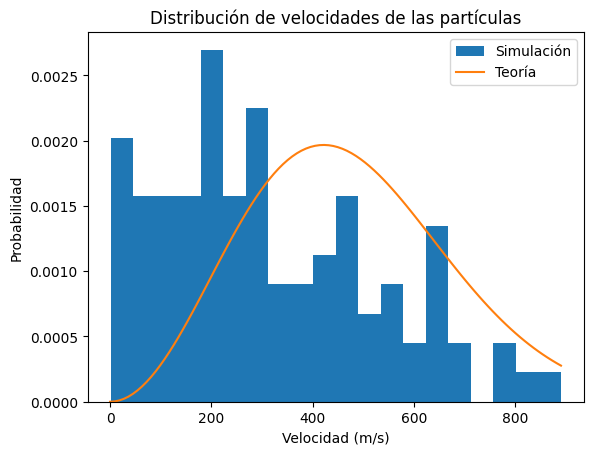

In [ ]:
# Importar librerías
import pygame
import random
import math
import matplotlib.pyplot as plt

# Definir constantes
k = 1.38e-23 # Constante de Boltzmann en J/K
m = 4.65e-26 # Masa de una partícula de nitrógeno en kg
T = 300 # Temperatura en K
N = 100 # Número de partículas
dt = 0.01 # Intervalo de tiempo en s
L = 1 # Longitud del lado de la caja en m
R = 0.01 # Radio de las partículas en m
scale = 500 # Escala para convertir metros a píxeles

# Inicializar pygame
pygame.init()
screen = pygame.display.set_mode((scale * L, scale * L))
pygame.display.set_caption("Simulación de dinámica molecular")
clock = pygame.time.Clock()

# Definir colores
BLACK = (0, 0, 0)
WHITE = (255, 255, 255)
RED = (255, 0, 0)

# Crear una clase para las partículas
class Particle:
    def __init__(self, x, y, vx, vy, r, color):
        self.x = x # Posición x
        self.y = y # Posición y
        self.vx = vx # Velocidad x
        self.vy = vy # Velocidad y
        self.r = r # Radio
        self.color = color # Color

    def move(self):
        # Actualizar la posición según la velocidad y el intervalo de tiempo
        self.x += self.vx * dt
        self.y += self.vy * dt

        # Rebotar si choca con las paredes de la caja
        if self.x - self.r < 0 or self.x + self.r > L:
            self.vx = -self.vx
        if self.y - self.r < 0 or self.y + self.r > L:
            self.vy = -self.vy

    def draw(self):
        # Dibujar la partícula en la pantalla
        pygame.draw.circle(screen, self.color, (int(self.x * scale), int(self.y * scale)), int(self.r * scale))

# Crear una lista vacía para almacenar las partículas
particulas = []

# Crear N partículas con posiciones y velocidades aleatorias
for i in range(N):
    # Generar una posición aleatoria dentro de la caja
    x = random.uniform(R, L - R)
    y = random.uniform(R, L - R)

    # Generar una velocidad aleatoria según la distribución de Maxwell-Boltzmann
    v = math.sqrt(2 * k * T / m) * random.gauss(0, 1)
    angulo = random.uniform(0, 2 * math.pi)
    vx = v * math.cos(angulo)
    vy = v * math.sin(angulo)

    # Crear una instancia de la clase Particle con los valores generados
    particle = Particle(x, y, vx, vy, R, RED)

    # Añadir la partícula a la lista
    particulas.append(particle)

# Bucle principal del juego
running = True
while running:

    # Limpiar la pantalla
    screen.fill(BLACK)

    # Mover y dibujar las partículas
    for particle in particulas:
        particle.move()
        particle.draw()

    # Actualizar la pantalla
    pygame.display.flip()

    # Controlar el tiempo entre fotogramas
    clock.tick(60)
    if pygame.time.get_ticks() > 30000:
        running = False

# Salir de pygame
pygame.quit()

# Calcular las velocidades absolutas de las partículas
velocidades = []
for particle in particulas:
    v = math.sqrt(particle.vx ** 2 + particle.vy ** 2)
    velocidades.append(v)

# Definir la función de distribución de Maxwell-Boltzmann usando np.exp
def f(v, T):
    return 4 * np.pi * (m / (2 * np.pi * k * T)) ** (3/2) * v ** 2 * np.exp(-m * v ** 2 / (2 * k * T))


# Definir el rango de velocidades para graficar la función teórica
v = np.linspace(0, max(velocidades), 100)

# Graficar el histograma de las velocidades simuladas y la función teórica
plt.hist(velocidades, bins=20, density=True, label="Simulación")
plt.plot(v, f(v, T), label="Teoría")
plt.xlabel("Velocidad (m/s)")
plt.ylabel("Probabilidad")
plt.title("Distribución de velocidades de las partículas")
plt.legend()
plt.show()


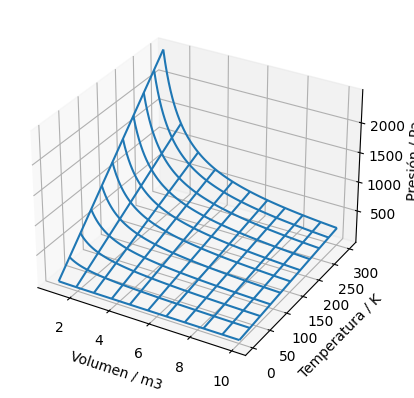

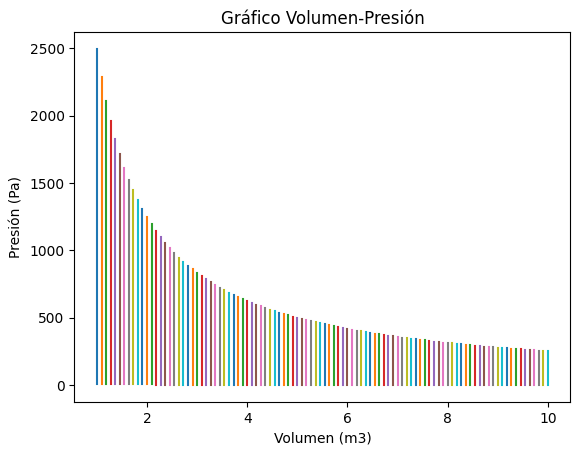

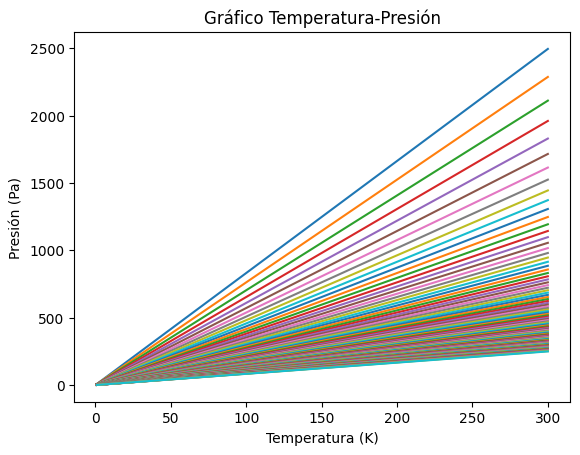

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from scipy import constants
import pathlib


def grid_points(volumen_array,
                temperatura_array,
                n_mol=1,
                R=constants.gas_constant):

    volumen_matrix, temperatura_matrix = np.meshgrid(
        volumen_array, temperatura_array)

    presion_matrix = n_mol * R * temperatura_matrix / volumen_matrix

    return volumen_matrix, temperatura_matrix, presion_matrix


def plot_3d(volumen_matrix,
            temperatura_matrix,
            presion_matrix,
            step=10):

    ax = plt.gca()
    ax.set_xlabel("Volumen / m3")
    ax.set_ylabel("Temperatura / K")
    ax.set_zlabel("Presión / Pa")
    ax.plot_wireframe(volumen_matrix, temperatura_matrix,
                      presion_matrix, rstride=step, cstride=step)



fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

vol = np.linspace(1, 10, 100)
temp = np.linspace(1, 300, 100)

v, t, p = grid_points(vol, temp)

plot_3d(v, t, p)

plt.show()

plt.plot(v,p)
plt.title("Gráfico Volumen-Presión")
plt.xlabel("Volumen (m3)")
plt.ylabel("Presión (Pa)")
plt.show()

plt.plot(t,p)
plt.xlabel("Temperatura (K)")
plt.ylabel("Presión (Pa)")
plt.title("Gráfico Temperatura-Presión")
plt.show()



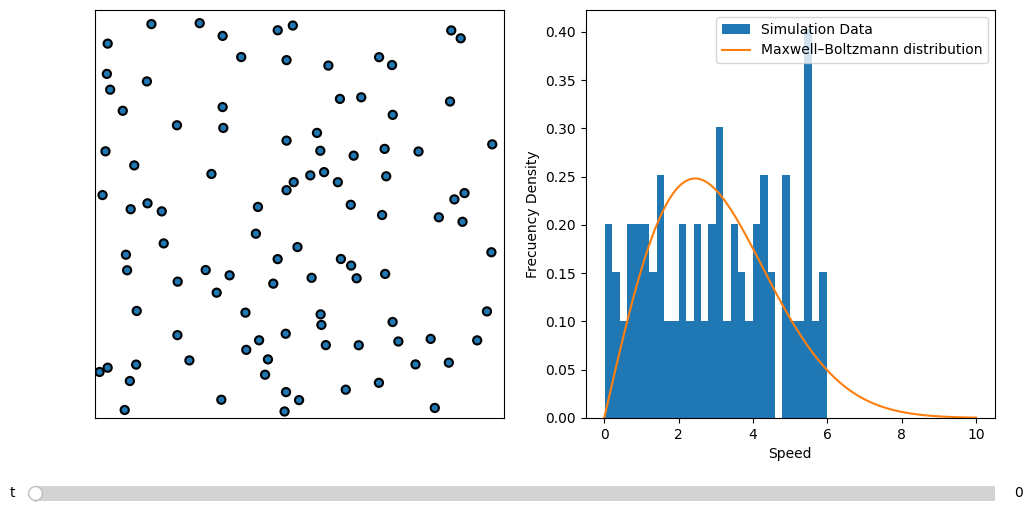

In [ ]:
import numpy as np




class Particle:
    """Define physics of elastic collision."""

    def __init__(self, mass, radius, position, velocity):
        """Initialize a Particle object

        mass the mass of particle
        radius the radius of particle
        position the position vector of particle
        velocity the velocity vector of particle
        """
        self.mass = mass
        self.radius = radius

        # last position and velocity
        self.position = np.array(position)
        self.velocity = np.array(velocity)

        # all position and velocidades recorded during the simulation
        self.solpos = [np.copy(self.position)]
        self.solvel = [np.copy(self.velocity)]
        self.solvel_mag = [np.linalg.norm(np.copy(self.velocity))]

    def compute_step(self, step):
        """Compute position of next step."""
        self.position += step * self.velocity
        self.solpos.append(np.copy(self.position))
        self.solvel.append(np.copy(self.velocity))
        self.solvel_mag.append(np.linalg.norm(np.copy(self.velocity)))




    def check_coll(self, particle):
        """Check if there is a collision with another particle."""

        r1, r2 = self.radius, particle.radius
        x1, x2 = self.position, particle.position
        di = x2-x1
        norm = np.linalg.norm(di)
        if norm-(r1+r2)*1.1 < 0:
            return True
        else:
            return False


    def compute_coll(self, particle, step):
        """Compute velocity after collision with another particle."""
        m1, m2 = self.mass, particle.mass
        r1, r2 = self.radius, particle.radius
        v1, v2 = self.velocity, particle.velocity
        x1, x2 = self.position, particle.position
        di = x2-x1
        norm = np.linalg.norm(di)
        if norm-(r1+r2)*1.1 < step*abs(np.dot(v1-v2, di))/norm:
            self.velocity = v1 - 2. * m2/(m1+m2) * np.dot(v1-v2, di) / (np.linalg.norm(di)**2.) * di
            particle.velocity = v2 - 2. * m1/(m2+m1) * np.dot(v2-v1, (-di)) / (np.linalg.norm(di)**2.) * (-di)


    def compute_refl(self, step, size):
        """Compute velocity after hitting an edge.
        step the computation step
        size the medium size
        """
        r, v, x = self.radius, self.velocity, self.position
        projx = step*abs(np.dot(v,np.array([1.,0.])))
        projy = step*abs(np.dot(v,np.array([0.,1.])))
        if abs(x[0])-r < projx or abs(size-x[0])-r < projx:
            self.velocity[0] *= -1
        if abs(x[1])-r < projy or abs(size-x[1])-r < projy:
            self.velocity[1] *= -1.


def solve_step(particle_list, step, size):
    """Solve a step for every particle."""

    # Detect edge-hitting and collision of every particle
    for i in range(len(particle_list)):
        particle_list[i].compute_refl(step,size)
        for j in range(i+1,len(particle_list)):
                particle_list[i].compute_coll(particle_list[j],step)


    # Compute position of every particle
    for particle in particle_list:
        particle.compute_step(step)




################################################################################################################################





def init_list_random(N, radius, mass, boxsize):
    """Generate N Particle objects in a random way in a list."""
    particle_list = []

    for i in range(N):

        v_mag = np.random.rand(1)*6
        v_ang = np.random.rand(1)*2*np.pi
        v = np.append(v_mag*np.cos(v_ang), v_mag*np.sin(v_ang))

        collision = True
        while(collision == True):

            collision = False
            pos = radius + np.random.rand(2)*(boxsize-2*radius)
            newparticle = Particle(mass, radius, pos, v)
            for j in range(len(particle_list)):

                collision = newparticle.check_coll( particle_list[j] )

                if collision == True:
                    break

        particle_list.append(newparticle)
    return particle_list



particle_number = 100
boxsize = 200.

# You need a larger tfin and stepnumber to get the equilibrium state. But the computation takes more time.
tfin = 10
stepnumber = 150

timestep = tfin/stepnumber

particle_list = init_list_random(particle_number, radius = 2, mass = 1, boxsize = 200)

# Compute simulation (It takes some time if stepnumber and particle_number are large)
for i in range(stepnumber):
    solve_step(particle_list, timestep, boxsize)
    #print(i)






################################################################################################################################


# Visualization of the solution with matplotlib. It use a slider to change the time


import matplotlib.pyplot as plt


fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1,2,1)

hist = fig.add_subplot(1,2,2)

plt.subplots_adjust(bottom=0.2,left=0.15)

ax.axis('equal')
ax.axis([-1, 30, -1, 30])

ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.set_xlim([0,boxsize])
ax.set_ylim([0,boxsize])

# Draw particulas as circles
circle = [None]*particle_number
for i in range(particle_number):
    circle[i] = plt.Circle((particle_list[i].solpos[0][0], particle_list[i].solpos[0][1]), particle_list[i].radius, ec="black", lw=1.5, zorder=20)
    ax.add_patch(circle[i])

# Graph particulas speed histogram
vel_mod = [particle_list[i].solvel_mag[0] for i in range(len(particle_list))]
hist.hist(vel_mod, bins= 30, density = True, label = "Simulation Data")
hist.set_xlabel("Speed")
hist.set_ylabel("Frecuency Density")



# Compute 2d Boltzmann distribution

#total energy should be constant for any time index
def total_Energy(particle_list, index):
    return sum([particle_list[i].mass / 2. * particle_list[i].solvel_mag[index]**2  for i in range(len(particle_list))])


E = total_Energy(particle_list, 0)
Average_E = E/len(particle_list)
k = 1.38064852e-23
T = 2*Average_E/(2*k)
m = particle_list[0].mass
v = np.linspace(0,10,120)
fv = m*np.exp(-m*v**2/(2*T*k))/(2*np.pi*T*k)*2*np.pi*v
hist.plot(v,fv, label = "Maxwell–Boltzmann distribution")
hist.legend(loc ="upper right")


from matplotlib.widgets import Slider

slider_ax = plt.axes([0.1, 0.05, 0.8, 0.05])
slider = Slider(slider_ax,      # the axes object containing the slider
                  't',            # the name of the slider parameter
                  0,          # minimal value of the parameter
                  tfin,          # maximal value of the parameter
                  valinit=0,  # initial value of the parameter
                  color = '#5c05ff'
                 )

def update(time):
    i = int(np.rint(time/timestep))

    #ax.set_title('Energy =' + str(Energy[i]))

    # Draw particulas as circles
    for j in range(particle_number):
        circle[j].center = particle_list[j].solpos[i][0], particle_list[j].solpos[i][1]
    hist.clear()

    # Graph particulas speed histogram
    vel_mod = [particle_list[j].solvel_mag[i] for j in range(len(particle_list))]
    hist.hist(vel_mod, bins= 30, density = True, label = "Simulation Data")
    hist.set_xlabel("Speed")
    hist.set_ylabel("Frecuency Density")

    # Compute 2d Boltzmann distribution
    E = total_Energy(particle_list, i)
    Average_E = E/len(particle_list)
    k = 1.38064852e-23
    T = 2*Average_E/(2*k)
    m = particle_list[0].mass
    v = np.linspace(0,10,120)
    fv = m*np.exp(-m*v**2/(2*T*k))/(2*np.pi*T*k)*2*np.pi*v
    hist.plot(v,fv, label = "Maxwell–Boltzmann distribution")
    hist.legend(loc ="upper right")

slider.on_changed(update)
plt.show()